<a href="https://colab.research.google.com/github/prachi735/Quantum_Mechanics/blob/master/Introduction_to_QuTip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

# Introduction

In [3]:
!pip install qutip

    100% |████████████████████████████████| 5.5MB 6.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/7d/f1/a4/f5687d0ab63c65cd818a29e7826f6ad677887730290476aabc
Successfully built qutip


In [0]:
from qutip import *

In [6]:
# create quantum object
q = Qobj([[1], [0]])
q

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [7]:
# the dimension, or composite Hilbert state space structure
q.dims

[[2], [1]]

In [8]:
# the shape of the matrix data representatoin
q.shape

(2, 1)

In [9]:
# the matrix data itself, in sparse matrix format
q.data

<2x1 sparse matrix of type '<class 'numpy.complex128'>'
	with 1 stored elements in Compressed Sparse Row format>

In [10]:
# get the dense matrix representation
q.full

<bound method Qobj.full of Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]>

In [11]:
# additional properties
q.isherm, q.type

(False, 'ket')

Using Qobj instances for calculations

In [19]:
sy = Qobj([[0,-1j], [1j,0]]) # the sigma-y Pauli operator
sy
print(sy)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]


In [21]:
sz = Qobj([[1,0], [0,-1]]) # the sigma-z Pauli operator
sz
print(sz)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]


In [24]:
# some airthmetic with quantum objects
H = 1.0 * sz + 0.1 * sy
print('Qibit Hamilton = \n', H)

Qibit Hamilton = 
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.+0.j   0.-0.1j]
 [ 0.+0.1j -1.+0.j ]]


In [30]:
# the hermitian conjugate
sy.dag()
print(sy.dag())

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]


In [31]:
# the trace
print(H.tr())

0.0


In [32]:
# Eigen energies
H.eigenenergies()

array([-1.00498756,  1.00498756])

In [35]:
# fundamental bais states (fock states of oscillator modes)

N = 2 # number of tates in the Hilbert space
n = 1 # the state that will occupied

print(basis(N, n)) # equivalent to fock(N, n)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]


In [39]:
print(fock(4, 2))

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]


In [38]:
# a coherent state
print(coherent(N = 10, alpha = 1.0))

Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[0.60653066]
 [0.60653066]
 [0.42888194]
 [0.24761511]
 [0.12380753]
 [0.0553686 ]
 [0.02260303]
 [0.00854887]
 [0.00299672]
 [0.00110007]]


# Density Matrices

In [40]:
# a fock state as density matrix
print(fock_dm(5,2)) # 5 = hilbert space size, 2 = state that is occupied

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [41]:
# coherent state as density matrix
print(coherent_dm(N = 8, alpha = 1.0))

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[3.67879439e-01 3.67879455e-01 2.60129900e-01 1.50187300e-01
  7.50858773e-02 3.36199110e-02 1.35485515e-02 5.77267786e-03]
 [3.67879455e-01 3.67879470e-01 2.60129911e-01 1.50187306e-01
  7.50858804e-02 3.36199124e-02 1.35485520e-02 5.77267810e-03]
 [2.60129900e-01 2.60129911e-01 1.83939513e-01 1.06198399e-01
  5.30937031e-02 2.37728537e-02 9.58026722e-03 4.08189737e-03]
 [1.50187300e-01 1.50187306e-01 1.06198399e-01 6.13141770e-02
  3.06539153e-02 1.37253761e-02 5.53121524e-03 2.35670388e-03]
 [7.50858773e-02 7.50858804e-02 5.30937031e-02 3.06539153e-02
  1.53253712e-02 6.86197771e-03 2.76532136e-03 1.17822997e-03]
 [3.36199110e-02 3.36199124e-02 2.37728537e-02 1.37253761e-02
  6.86197771e-03 3.07246966e-03 1.23818035e-03 5.27555757e-04]
 [1.35485515e-02 1.35485520e-02 9.58026722e-03 5.53121524e-03
  2.76532136e-03 1.23818035e-03 4.98976640e-04 2.12600691e-04]
 [5.77267786e-03 5.77267810e-03 4.0

In [42]:
# the thermal state
n = 1 # the average number of thermal photons
print(thermal_dm(8, n))

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0.50196078 0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.25098039 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.1254902  0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.0627451  0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.03137255 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.01568627
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.00784314 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.00392157]]


## Operators

In [43]:
# Pauli sigma x
print(sigmax())

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]


In [45]:
# Pauli sigma y
print(sigmay())

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]


In [46]:
# Pauli sigma z 
print(sigmaz())

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]


##  Harmonic oscillator operators

In [49]:
# annihilation operator

print(destroy(N = 8)) # N = number of fock states included in the Hilbert space

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[0.         1.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         1.41421356 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         1.73205081 0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         2.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         2.23606798
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  2.44948974 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         2.64575131]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]


In [50]:
# creation operator

print(create(N = 8)) # equivalent to destroy(5).dag()

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [1.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         1.41421356 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         1.73205081 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         2.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         2.23606798 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         2.44948974
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  2.64575131 0.        ]]


In [51]:
# the position operator is easily constructed from the annihilation operator
a = destroy(8)
x = a + a.dag()
print(x)

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0.         1.         0.         0.         0.         0.
  0.         0.        ]
 [1.         0.         1.41421356 0.         0.         0.
  0.         0.        ]
 [0.         1.41421356 0.         1.73205081 0.         0.
  0.         0.        ]
 [0.         0.         1.73205081 0.         2.         0.
  0.         0.        ]
 [0.         0.         0.         2.         0.         2.23606798
  0.         0.        ]
 [0.         0.         0.         0.         2.23606798 0.
  2.44948974 0.        ]
 [0.         0.         0.         0.         0.         2.44948974
  0.         2.64575131]
 [0.         0.         0.         0.         0.         0.
  2.64575131 0.        ]]


## Using Qobj instances to check some commutation relations

In [0]:
def commutator(op1, op2):
  return op1 * op2 - op2 * op1

In [55]:
a = destroy(5)

print(commutator(a, a.dag()))

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0. -4.]]


In [0]:
from math import sqrt

In [0]:
x = (a + a.dag())/sqrt(2)
p = -1j * (a - a.dag())/sqrt(2)

In [62]:
print(commutator(x, p))

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = False
Qobj data =
[[0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-4.j]]


In [63]:
print(commutator(sigmax(), sigmay()) - 2j * sigmaz())

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 0.]]


In [65]:
print(-1j * sigmax() * sigmay() * sigmaz())

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]


In [69]:
sigmax()**2 == sigmay()**2 == sigmaz()**2 == qeye(2)

True

## Composite systems

In [70]:
sz1 = tensor(sigmaz(), qeye(2))
print(sz1)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0. -1.]]


In [0]:
psi1 = tensor(basis(N,1), basis(N,0)) # excited first qubit
psi2 = tensor(basis(N,0), basis(N,1)) # excited second qubit

In [72]:
sz1 * psi1 == psi1 # this should not be true, because sz1 should flip the sign of the excited state of psi1

False

In [73]:
sz1 * psi2 == psi2 # this should be true, because sz1 should leave psi2 unaffected

True

In [74]:
sz2 = tensor(qeye(2), sigmaz())
print(sz2)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]


In [75]:
print(tensor(sigmax(), sigmax()))

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]


In [76]:
epsilon = [1.0, 1.0]
g = 0.1

sz1 = tensor(sigmaz(), qeye(2))
sz2 = tensor(qeye(2), sigmaz())

H = epsilon[0] * sz1 + epsilon[1] * sz2 + g * tensor(sigmax(), sigmax())
print(H)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 2.   0.   0.   0.1]
 [ 0.   0.   0.1  0. ]
 [ 0.   0.1  0.   0. ]
 [ 0.1  0.   0.  -2. ]]


In [77]:
wc = 1.0 # cavity frequency
wa = 1.0 # qubit/atom frequency
g = 0.1 # coupling strength

# cavity mode operator
a = tensor(destroy(5), qeye(2))

# qubit/atom operators
sz = tensor(qeye(5), sigmaz()) # sigma-z operator
sm = tensor(qeye(5), destroy(2)) # sigma-minus operator

# the Jaynes-Cumming Hamiltonian
H = wc * a.dag() * a -0.5 * wa * sz + g * (a * sm.dag() + a.dag() * sm)
print(H)

Quantum object: dims = [[5, 2], [5, 2]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[-0.5         0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.5         0.1         0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.1         0.5         0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          1.5         0.14142136  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.14142136  1.5         0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          2.5
   0.17320508  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.17320508
   2.5         0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.   

In [78]:
a = tensor(destroy(3), qeye(2))
sp = tensor(qeye(3), create(2))
print(a * sp)

Quantum object: dims = [[3, 2], [3, 2]], shape = (6, 6), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.41421356 0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]


In [80]:
print(tensor(destroy(3), create(2)))

Quantum object: dims = [[3, 2], [3, 2]], shape = (6, 6), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.41421356 0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]


## Unitary dynamics

In [82]:
# Hamiltonian
H = sigmax()

# initial state
psi0 = basis(2,0)

# list of times for which the solver should store the state vector
tlist = np.linspace(0, 10, 100)

result = mesolve(H, psi0, tlist, [], [])
print(result)

Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0


In [83]:
len(result.states)

100

In [85]:
print(result.states[-1]) # the final state

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.8390774+0.j        ]
 [ 0.       +0.54401206j]]


## Expectation values

In [86]:
expect(sigmaz(), result.states[-1])

0.40810176186454994

In [87]:
expect(sigmaz(), result.states)

array([ 1.        ,  0.97966324,  0.91948013,  0.82189857,  0.69088756,
        0.53177579,  0.3510349 ,  0.15601625, -0.04534808, -0.24486795,
       -0.43442821, -0.60631884, -0.75354841, -0.87012859, -0.95131766,
       -0.99381332, -0.99588712, -0.95745468, -0.88007921, -0.76690787,
       -0.62254375, -0.45285867, -0.26475429, -0.06588149,  0.13567091,
        0.33170513,  0.51424779,  0.67587427,  0.81001063,  0.91120109,
        0.97532984,  0.99978853,  0.9835823 ,  0.92737033,  0.83343897,
        0.70560878,  0.54907906,  0.37021643,  0.17629587, -0.02479521,
       -0.22487778, -0.41581382, -0.58983733, -0.73987014, -0.85980992,
       -0.94477826, -0.9913192 , -0.99753971, -0.96318677, -0.88965766,
       -0.77994308, -0.63850553, -0.4710978 , -0.28452892, -0.08638732,
        0.11526793,  0.31223484,  0.49650212,  0.660575  ,  0.79778003,
        0.90253662,  0.97058393,  0.99915421,  0.98708537,  0.9348683 ,
        0.84462688,  0.72003156,  0.56615011,  0.38924141,  0.19

Text(0, 0.5, '$\\left<\\sigma_z\\right>$')

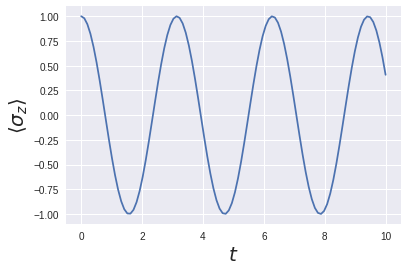

In [90]:
fig, axes = plt.subplots(1, 1)
axes.plot(tlist, expect(sigmaz(), result.states))

axes.set_xlabel(r'$t$', fontsize = 20)
axes.set_ylabel(r'$\left<\sigma_z\right>$', fontsize = 20)

In [0]:
result = mesolve(H, psi0, tlist, [], [sigmax(), sigmay(), sigmaz()])

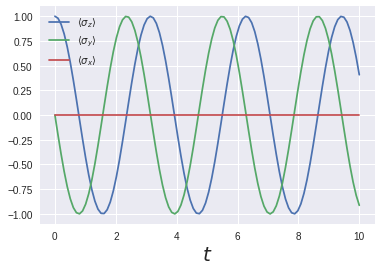

In [94]:
fig, axes = plt.subplots(1,1)

axes.plot(tlist, result.expect[2], label = r'$\left<\sigma_z\right>$')
axes.plot(tlist, result.expect[1], label = r'$\left<\sigma_y\right>$')
axes.plot(tlist, result.expect[0], label = r'$\left<\sigma_x\right>$')

axes.set_xlabel(r'$t$', fontsize = 20)
axes.legend(loc = 2)

# Dissipative dynamics

In [0]:
w = 1.0 # oscillator frequency
kappa = 0.1 # relaxation rate
a = destroy(10) # oscillator annihilation operator
rho0 = fock_dm(10, 5) # initial state, fock state with 5 photos
H = w * a.dag() * a # Hamiltonian

# a list of collapse operators
c_ops = [sqrt(kappa) * a]

In [0]:
tlist = np.linspace(0, 50, 100)

# request that the solver return the expectation value of the photon number
# state operator a.dog() * a
result = mesolve(H, rho0, tlist, c_ops, [a.dag() * a])

Text(0, 0.5, 'Photon number')

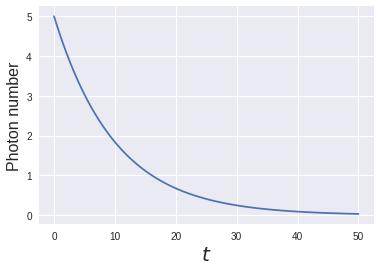

In [101]:
fig, axes = plt.subplots(1, 1)
axes.plot(tlist, result.expect[0])
axes.set_xlabel(r'$t$', fontsize = 20)
axes.set_ylabel(r"Photon number", fontsize = 16)

## software versions

In [102]:
from qutip.ipynbtools import version_table
version_table()

Software,Version
QuTiP,4.3.1
Numpy,1.14.6
SciPy,1.1.0
matplotlib,3.0.2
Cython,0.29.5
Number of CPUs,1
BLAS Info,OPENBLAS
IPython,5.5.0
Python,"3.6.7 (default, Oct 22 2018, 11:32:17) [GCC 8.2.0]"
OS,posix [linux]
